

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#fuente de pdatos
data_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/data/datos_sanidad_hosp.csv'
img_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/img/'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

Leemos los datos en un `pandas`

In [5]:
df = pd.read_csv(data_path)

veamos una rápida descripción de la información:

In [6]:
df.describe()

,Hosp_Totales,Hosp_actual,UCI_actual,Ingresos_24horas,Altas_24horas
count,4161.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,159.712078,264.859549,155.573969,104.864154,96.368421
std,545.940379,279.554523,183.682822,132.042938,130.367619
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.632000,4.548750,38.000000,19.250000,16.000000
50%,7.683000,184.000000,83.000000,52.000000,44.000000
75%,29.444000,469.000000,199.500000,133.750000,122.000000
max,4991.000000,996.000000,824.000000,684.000000,729.000000


y un muestreo de valores y de algunas columnas de interés:

In [7]:
df.head()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
0,2020-10-23,Andalucía,12.143,727,1.214,23,1.967,"11,95%",251.0,"16,30%",320.0,198.0
1,2020-10-23,Aragón,6.205,366,486,30,635.000,"15,31%",83.0,"42,56%",94.0,73.0
2,2020-10-23,Asturias,1.728,186,171,3,354.000,"10,93%",40.0,"15,38%",50.0,29.0
3,2020-10-23,Baleares,2.033,23,291,2,174.000,"5,68%",41.0,"14,39%",21.0,12.0
4,2020-10-23,Canarias,2182.000,95,423,23,349.000,"7,07%",47.0,"11,16%",22.0,21.0


In [8]:
df.tail()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
4156,2020-10-21,Melilla,141.000,12,15,5,NaN,NaN,NaN,NaN,NaN,NaN
4157,2020-10-21,Murcia,2685.000,220,383,31,NaN,NaN,NaN,NaN,NaN,NaN
4158,2020-10-21,Navarra,3.204,182,239,19,NaN,NaN,NaN,NaN,NaN,NaN
4159,2020-10-21,País Vasco,9.036,60,741,6,NaN,NaN,NaN,NaN,NaN,NaN
4160,2020-10-21,La Rioja,2.011,56,156,14,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def formato_(x):
    if x is np.NaN:
        return x
    else:
        return float(x[:-2].replace(',','.'))
    

In [10]:
df['%CamasUCI'] = df['%CamasUCI'].apply(formato_)
df['%CamasCovid'] = df['%CamasCovid'].apply(formato_)

In [11]:
comunidades = sorted(df['ccaa'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [12]:
df['fecha']=pd.to_datetime(df['fecha'],format='%Y-%m-%d')

In [13]:
df.sort_values(['fecha']).tail()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
1389,2021-02-10,Asturias,6.720,335,494,27,695.000,19.87,123.0,36.94,84.0,76.0
1388,2021-02-10,Aragón,11.699,360,1.043,21,741.000,17.59,92.0,38.98,103.0,83.0
1387,2021-02-10,Andalucía,33.125,1.128,3.240,56,4.116,22.64,724.0,37.40,346.0,561.0
1396,2021-02-10,Ceuta,253.000,1,30,2,28.000,14.14,6.0,35.29,2.0,2.0
1405,2021-02-10,La Rioja,3.099,85,348,20,216.000,25.81,57.0,65.52,13.0,26.0


In [14]:
df.columns

Index(['fecha', 'ccaa', 'Hosp_Totales', 'Hosp_7días', 'UCI_Totales',
       'UCI_7dias', 'Hosp_actual', '%CamasCovid', 'UCI_actual', '%CamasUCI',
       'Ingresos_24horas', 'Altas_24horas'],
      dtype='object')

In [15]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [16]:
df.iloc[1]['fecha'].year

2020

# Gráfico IA7

In [17]:
df['fecha']

0      2020-10-23
1      2020-10-23
2      2020-10-23
3      2020-10-23
4      2020-10-23
          ...    
4156   2020-10-21
4157   2020-10-21
4158   2020-10-21
4159   2020-10-21
4160   2020-10-21
Name: fecha, Length: 4161, dtype: datetime64[ns]

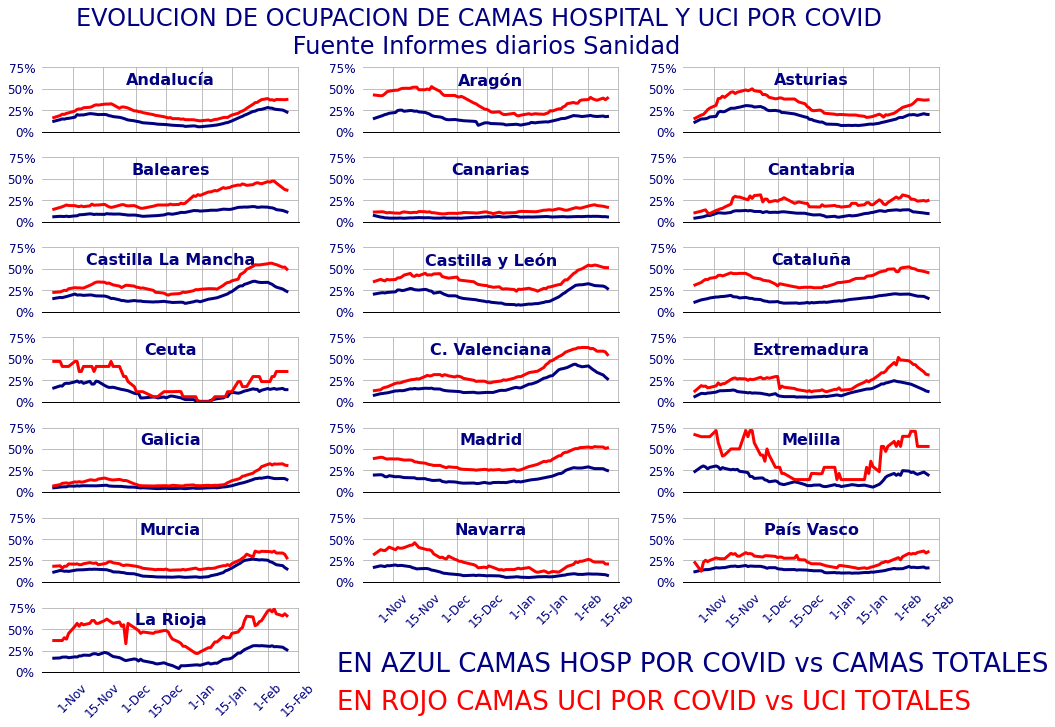

In [18]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(df,col='ccaa',hue='ccaa',col_wrap=3,aspect=3, 
                      margin_titles=False,height=1.5,sharey=True)

# Título

titulo = 'EVOLUCION DE OCUPACION DE CAMAS HOSPITAL Y UCI POR COVID \n Fuente Informes diarios Sanidad'
color_titulos = 'navy'
color_uci='red'
color_covid='navy'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos = df.loc[df['ccaa'] == label].sort_values(['fecha'])
   
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,75)
    ax1.set_yticks([0,25,50,75])
    
    ax1.yaxis.set_major_formatter(yticks)
    #ax1.set_yticks([]
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.plot(df_datos['fecha'], df_datos['%CamasCovid'],lw=3,color=color_covid,label='A')
    
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['fecha'], df_datos['%CamasUCI'], lw=3, color=color_uci,label='B')
    ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_uci,pad=-10)
    ax2.yaxis.set_major_formatter(yticks)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    
    ax2.set_ylim(0,75)
    ax2.set_yticks([0,25,50,75])
    ax2.set_yticks([])
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    #ax2.xaxis.set_major_locator(DayLocator([1]))
    #ax2.legend()
    
g.map(grafica,'ccaa')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=24,color='navy')
g.fig.text(x=.35,y=.05,s='EN ROJO CAMAS UCI POR COVID vs UCI TOTALES',color='red',fontsize=26)
g.fig.text(x=.35,y=.1,s='EN AZUL CAMAS HOSP POR COVID vs CAMAS TOTALES',color='navy',fontsize=26)

g.fig.subplots_adjust(top=.9,wspace=0.25,hspace=0.4)
plt.savefig(img_path+'uci_hosp_comunidades.png',dpi=288)  
# plt.tight_layout()
plt.show()
